## BA 545 Course Project 2: Machine Team 4 
#### Online Shoppers Purchasing Intentions
##### Michael Disanto, Dawn Massey PhD CPA CGMA, Brian Nicholls
###### Final Models (4) - Spring 2020
----------------------------------------------------------------------


### **Table of Contents:**

0. [Preparing for Analyisis](#part4.0)
1. [Initial Review and Vizualization of the Data](#part4.1)
2. [Process the Data for Initial Data Models](#part4.2)
3. [Split and Run the Final Models with Selected Features and Optimized hyperperameters](#part4.3)
4. [Evaluate all the methods and compare using Ensambel Ranking](#part4.4)
5. [Run and Evaluate the Final Models with Over Sampled data using SMOTE](#part4.5)
6. [Run and Evaluate the Final Models using TPOT](#part4.6)


## 0. Preparing for Analysis  <a name="part4.0"></a>
####  Import the necesary packages for reading, analyzing, tidying, medeling, & evaluating the data

In [1]:
# # TO USE FOR ENTIRE TEAM
# import pandas as pd
# import numpy as np
# from pandas_profiling import ProfileReport
# import statsmodels.api as sm
# from scipy import stats
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

In [2]:
# Excluding Items not in Fairfield Jupiter Lab
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

In [3]:
# Import the necesary packages for reading, analyzing, tidying, modeling, & evaluating the data 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test)

from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)

from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)

# Imputation
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

# Train/Test Split
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()

from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()

from sklearn.svm import SVC 
# svc = SVC(kernel='linear')

from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)

from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)

# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)

# Packages for Over/Under Sampling
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss

import warnings
warnings.filterwarnings('ignore')

# 1. Initial review and vizualization of the data  <a name="part4.1"></a>

In [4]:
# Pull in our original data and a copy for the base model
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')
df_base = df.copy()

In [5]:
# Investigate the datatypes and descriptive statistics of the dataset
display(df_base.info())
display(df_base.describe())
print(' ')
display(df_base.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

None

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


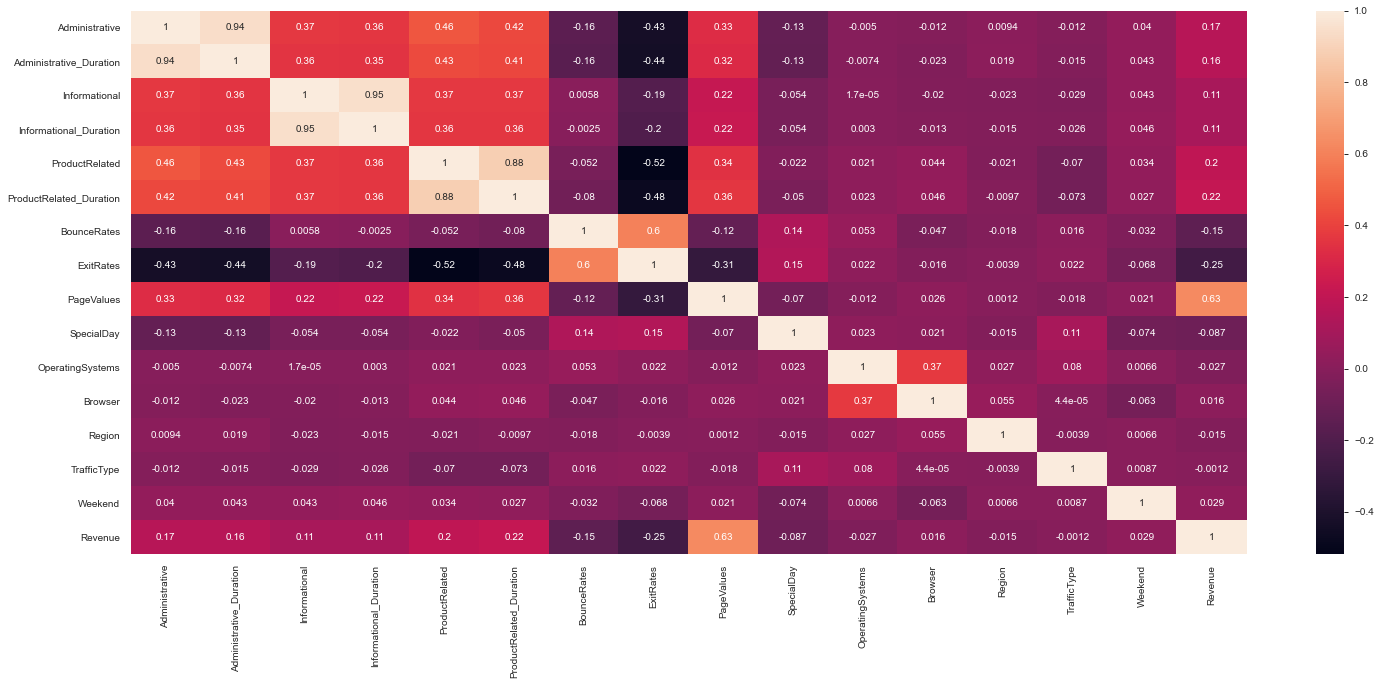

In [6]:
# Correlation Heatmap for the dataframe
spearman =df.corr(method ='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(spearman, annot=True)

# 2. Process the data for Initial Data Models  <a name="part4.2"></a>

    2.0 Pipeline [Prep] - Create subsets and list to be used later in the pipeline:

In [7]:
# Create Continuous Variable List
df_continuous = df.iloc[:,:9]
continuous_df_list = df_continuous.columns.tolist()

# Create Categorical Variable List
df_categorical = df.iloc[:,9:-1]
categorical_df_list = df_categorical.columns.tolist()


    2.1 Pipeline [Impute] - Initial Imputation of Categorical Features:

In [8]:
# Pipeline - Initial Imputation of Categorical Features:

## Replace the VisitorType 'Other' with the variable's mode, namely: 'Returning_Visitor'
df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')
df.groupby('VisitorType').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
VisitorType,,,,,,,,,,,,,,,,,
New_Visitor,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694
Returning_Visitor,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636


In [9]:
# Encode Revenue before splitting the data to allow for modeling

enc = LabelEncoder()

df['VisitorType'] = enc.fit_transform(df['VisitorType'])
df['Weekend'] = enc.fit_transform(df['Weekend'])
df['Revenue'] = enc.fit_transform(df['Revenue'])

In [10]:
# Pipeline - Binning Categorical Features:

def holiday_bin_func(month) :
    if month == 'May':
        return int(1)
    elif month == 'Feb':
        return int(1)
    else:
        return int(0)
    
df['Holiday_Bin'] = df['Month'].apply(holiday_bin_func)

##Reduce months to the top 4 in which there are transactions and "other"
def month_bin_func(month) :
    if month == 'May':
        return int(5)
    elif month == 'Nov':
        return int(11)
    elif month == 'Mar':
        return int(3)
    elif month == 'Dec':
        return int(12)
    else:
        return int(0)
    
df['Month_Bin'] = df['Month'].apply(month_bin_func)


##Encode month names to numerical representations

def month_func(month) :
    if month == 'Jan':
        return int(1)
    elif month == 'Feb':
        return int(2)
    elif month == 'Mar':
        return int(3)
    elif month == 'Apr':
        return int(4)
    elif month == 'May':
        return int(5)
    elif month == 'June':
        return int(6)
    elif month == 'Jul':
        return int(7)
    elif month == 'Aug':
        return int(8)
    elif month == 'Sep':
        return int(9)
    elif month == 'Oct':
        return int(10)
    elif month == 'Nov':
        return int(11)
    elif month == 'Dec':
        return int(12)

df['Month'] = df['Month'].apply(month_func)

def month_quarterly_func(month) :
    if month <= 3:
        return int(1)
    elif month >= 4 and month <= 6:
        return int(2)
    elif month >= 7 and month <= 9:
        return int(3)
    elif month >= 10 and month <= 12:
        return int(4)

df['Quarter'] = df['Month'].apply(month_quarterly_func)

##Reduce categories for Operating Systems to the top 3 plus "other"
### Operating Systems – is a categorical variable and most of the data (~95%) is in one of three operating systems (2, 1, 3). 
def binning_operating_systems(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Operating Systems > 3

df['OperatingSystems_Bin']=df['OperatingSystems'].apply(binning_operating_systems)   # Creating a new column in the df


      
##Reduce categories for Browser to the top 3 plus "other"
### Browser – is a categorical variable and most the data (~91%) come from three browsers (2, 1, 4).
def binning_browser(B):
    if (B == 3) or (B > 4): 
        return(3) 
    else:
        return(B) 

df['Browser_Bin']=df['Browser'].apply(binning_browser)   # Creating a new column in the df
      
      
##Reduce categories for Region to the top 4 plus "other"
### Region – is a categorical variable for region from which the visitor came. The top four account for ~77% of the data (i.e., region 1, 3, 4, 2).
def binning_region(B):
    if (B <= 4):
        return(B)
    else:
        return(5) # creating a category of 5 for all Regions > 4

df['Region_Bin']=df['Region'].apply(binning_region)   # Creating a new column in the df

      
      
##Reduce categories for TrafficType to the top 3 plus "other"
### TrafficType – is a categorical variable to indicate how visitor arrived at website. The top three account for approximately 67% of the referrals (i.e., types 2, 1, 3).
def binning_traffic_type(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Traffic Types > 3

df['TrafficType_Bin']=df['TrafficType'].apply(binning_traffic_type)   # Creating a new column in the df

In [11]:
# add creates features / bins to categorical list
added_categorical_features = df.iloc[:,-7:]
added_categorical_list = added_categorical_features.columns.tolist()

##Combine added features list with categorical list
categorical_df_list = categorical_df_list + added_categorical_list

##Check work by printing combined categorical list
categorical_df_list

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Holiday_Bin',
 'Month_Bin',
 'Quarter',
 'OperatingSystems_Bin',
 'Browser_Bin',
 'Region_Bin',
 'TrafficType_Bin']

    2.2 Pipeline [Transform] - Initial Log Transformation Continuous Features:

In [12]:
# Impute zeros to one (by adding one to all values) before applying the log transformation

# Impute Zeros before doing the log
for column in continuous_df_list:
    df[column] = df[column] + 1

# Check imputation by printing a samplle of rows
display(df[continuous_df_list].sample(20))

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
4287,1,1.000000,2,1.000000,16,182.500000,1.012500,1.050000,1.000000
11896,10,248.050000,5,73.000000,11,160.300000,1.012500,1.058333,1.000000
7703,8,200.833333,1,1.000000,28,670.933333,1.000000,1.000000,1.000000
1348,1,1.000000,1,1.000000,6,280.000000,1.000000,1.040000,1.000000
3177,2,28.000000,1,1.000000,5,468.000000,1.000000,1.025000,1.000000
10304,3,34.500000,1,1.000000,109,2271.908333,1.005505,1.029664,1.000000
6781,11,580.133333,1,1.000000,23,540.835714,1.000000,1.004762,26.533004
6692,2,6.000000,1,1.000000,7,120.600000,1.000000,1.014286,1.000000
4388,7,225.000000,1,1.000000,34,678.950000,1.005714,1.019683,1.000000
6327,1,1.000000,1,1.000000,15,1050.050000,1.000000,1.016667,1.000000


    2.3 Pipeline [Calcualated Features] - Initial Feature Engineering of continuous features:

In [13]:
# Perform initial log transformation on PageValues
df['PageValues_Log'] = np.log(df['PageValues'])

# Create features combining ('ExitRates' and 'BounceRates'), which are highly correlated with each other and the target
df['Bounce_Exit_Rate_Avg'] = (df['BounceRates'] + df['ExitRates'])/2
df['Bounce_Exit_Rate_WeightedAvg'] = ((df['BounceRates']*.6) + (df['ExitRates']*.4))
df['Bounce_Exit_Rate_Avg_PageVales'] = (df['Bounce_Exit_Rate_Avg'] / df['PageValues']) # add a chart to compare the trends and distributions
df['Bounce_per_Exit_Rate'] = df['BounceRates'] / df['ExitRates']

# Create features combining ('Administrative' and 'Administrative_Duration') and ('ExitRates' and 'BounceRates'), which are highly correlated with each other and the target
df['Admin_per_Exit'] = df['Administrative'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_Bounce'] = df['Administrative'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'

df['Admin_dur_per_Exit'] = df['Administrative_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_Bounce'] = df['Administrative_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['Administrative_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'


# Create features combining ('Informational' and 'Informational_Duration') and, ('ExitRates' and 'BounceRates'), which are highly correlated with each other and the target
df['Info_per_Exit'] = df['Informational'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_per_Bounce'] = df['Informational'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_per_bounce_exit_avg'] = df['Informational'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'

df['Info_dur_per_Exit'] = df['Informational_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_Bounce'] = df['Informational_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_bounce_exit_avg'] = df['Informational_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'


# Create features combining ('ProductRelated' and 'ProductRelated_Duration') and, ('ExitRates' and 'BounceRates'), which are highly correlated with each other and the target
df['Product_per_Exit'] = df['ProductRelated'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_per_Bounce'] = df['ProductRelated'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Prod_per_bounce_exit_avg'] = df['ProductRelated'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'

df['Product_dur_per_Exit'] = df['ProductRelated_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_dur_per_Bounce'] = df['ProductRelated_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg
df['Prod_dur_per_bounce_exit_avg'] = df['ProductRelated_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'


# Create features combining ('Administrative_Duration','Informational_Duration' and 'ProductRelated_Duration'), which are highly correlated with each other and the target
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Duration_Avg'] = (df['Total_Duration'])/3
df['Admin_Duration_percent_TotalDuration'] = df['Administrative_Duration'] / df['Total_Duration']
df['Info_Duration_percent_TotalDuration'] = df['Informational_Duration'] / df['Total_Duration']
df['Product_Duration_percent_TotalDuration'] = df['ProductRelated_Duration'] / df['Total_Duration']


# Create features related to 'Total_Duration' as compared to ('ExitRates', 'BounceRates' and a combination of the two), which are highly correlated with each other and the target
df['TotalDuration_per_ExitRates'] = df['Total_Duration'] / df['ExitRates']
df['TotalDuration_per_BounceRates'] = df['Total_Duration'] / df['BounceRates']
df['TotalDuration_per_BounceExit_avg'] = df['Total_Duration'] / df['Bounce_Exit_Rate_Avg']


#Create features using 'PageValues', which is highly correlated with the target,as the denominator
df['Admin_per_PageValues'] = df['Administrative'] / df['PageValues']
df['Admin_Duration_per_PageValues'] = df['Administrative_Duration'] / df['PageValues']
df['Informational_per_PageValues'] = df['Informational'] / df['PageValues']
df['Info_Duration_per_PageValues'] = df['Informational_Duration'] / df['PageValues']
df['ProductRelated_per_PageValues'] = df['ProductRelated'] / df['PageValues']
df['Product_Duration_per_PageValues'] = df['ProductRelated_Duration'] / df['PageValues']
df['TotalDuration_per_PageValues'] = df['Total_Duration'] / df['PageValues']
df['Exit_per_PageValues'] = df['ExitRates'] / df['PageValues']
df['Bounce_per_PageValues'] = df['BounceRates'] / df['PageValues']

In [14]:
# Add transformed / calculated features to continuous list

##Create added features list (to include PageValues_Log)
added_continuous_features = df.iloc[:,-40:]
added_continuous_list = added_continuous_features.columns.tolist()

In [15]:
##Combine added features list with continuous list
continuous_df_list = continuous_df_list + added_continuous_list

In [16]:
##Check work by printing a list of the added continouous columns
continuous_df_list

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'PageValues_Log',
 'Bounce_Exit_Rate_Avg',
 'Bounce_Exit_Rate_WeightedAvg',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_Exit_Rate',
 'Admin_per_Exit',
 'Admin_per_Bounce',
 'Admin_per_bounce_exit_avg',
 'Admin_dur_per_Exit',
 'Admin_dur_per_Bounce',
 'Admin_dur_per_bounce_exit_avg',
 'Info_per_Exit',
 'Info_per_Bounce',
 'Info_per_bounce_exit_avg',
 'Info_dur_per_Exit',
 'Info_dur_per_Bounce',
 'Info_dur_per_bounce_exit_avg',
 'Product_per_Exit',
 'Product_per_Bounce',
 'Prod_per_bounce_exit_avg',
 'Product_dur_per_Exit',
 'Product_dur_per_Bounce',
 'Prod_dur_per_bounce_exit_avg',
 'Total_Duration',
 'Total_Duration_Avg',
 'Admin_Duration_percent_TotalDuration',
 'Info_Duration_percent_TotalDuration',
 'Product_Duration_percent_TotalDuration',
 'TotalDuration_per_ExitRates',
 'TotalDuration_per_Bounc

In [17]:
# Review the created columns in a sample
new_continuous_df = df.loc[:,continuous_df_list]
y = df.loc[:,'Revenue']
display(new_continuous_df.sample(20))
display(' ')
new_categorical_df = df.loc[:,categorical_df_list]
display(new_categorical_df.sample(20))


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,PageValues_Log,...,TotalDuration_per_BounceExit_avg,Admin_per_PageValues,Admin_Duration_per_PageValues,Informational_per_PageValues,Info_Duration_per_PageValues,ProductRelated_per_PageValues,Product_Duration_per_PageValues,TotalDuration_per_PageValues,Exit_per_PageValues,Bounce_per_PageValues
12277,1,1.000,1,1.0,3,41.500000,1.000000,1.100000,1.000000,0.000000,...,41.428571,1.000000,1.000000,1.000000,1.000000,3.000000,41.500000,43.500000,1.100000,1.000000
3825,3,73.500,1,1.0,11,1581.000000,1.000000,1.018182,101.096364,4.616074,...,1640.585586,0.029675,0.727029,0.009892,0.009892,0.108807,15.638545,16.375465,0.010071,0.009892
3115,1,1.000,1,1.0,12,211.000000,1.009091,1.024242,1.000000,0.000000,...,209.508197,1.000000,1.000000,1.000000,1.000000,12.000000,211.000000,213.000000,1.024242,1.009091
8324,1,1.000,1,1.0,6,83.000000,1.000000,1.040000,1.000000,0.000000,...,83.333333,1.000000,1.000000,1.000000,1.000000,6.000000,83.000000,85.000000,1.040000,1.000000
5225,4,239.400,1,1.0,9,133.233333,1.000000,1.007407,1.000000,0.000000,...,372.254613,4.000000,239.400000,1.000000,1.000000,9.000000,133.233333,373.633333,1.007407,1.000000
3549,2,1.000,1,1.0,8,38.000000,1.083333,1.108333,1.000000,0.000000,...,36.501901,2.000000,1.000000,1.000000,1.000000,8.000000,38.000000,40.000000,1.108333,1.083333
11451,7,72.375,1,1.0,74,2336.633333,1.000000,1.012500,3.515916,1.257300,...,2395.039337,1.990946,20.584964,0.284421,0.284421,21.047148,664.587387,685.456771,0.287976,0.284421
10848,1,1.000,1,1.0,3,139.500000,1.000000,1.100000,1.000000,0.000000,...,134.761905,1.000000,1.000000,1.000000,1.000000,3.000000,139.500000,141.500000,1.100000,1.000000
8004,4,140.000,1,1.0,36,632.933333,1.005263,1.015789,1.000000,0.000000,...,765.871528,4.000000,140.000000,1.000000,1.000000,36.000000,632.933333,773.933333,1.015789,1.005263
4859,2,5.000,1,1.0,51,550.916667,1.000000,1.008163,1.000000,0.000000,...,554.652778,2.000000,5.000000,1.000000,1.000000,51.000000,550.916667,556.916667,1.008163,1.000000


' '

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Holiday_Bin,Month_Bin,Quarter,OperatingSystems_Bin,Browser_Bin,Region_Bin,TrafficType_Bin
760,0.0,3,1,1,1,2,1,0,0,3,1,1,1,1,2
7187,0.0,8,1,1,4,2,0,1,0,0,3,1,1,4,2
8750,0.0,11,3,3,5,11,1,1,0,11,4,3,3,5,4
8768,0.0,11,2,2,9,2,0,0,0,11,4,2,2,5,2
1802,0.0,3,2,5,1,1,1,0,0,3,1,2,3,1,1
7548,0.0,6,2,2,3,1,1,0,0,0,2,2,2,3,1
12134,0.0,11,3,2,1,2,0,1,0,11,4,3,2,1,2
5799,0.0,8,2,2,6,2,1,0,0,0,3,2,2,5,2
3559,0.0,5,2,2,3,6,1,0,1,5,2,2,2,3,4
6561,0.0,8,3,2,3,4,1,1,0,0,3,3,2,3,4


    2.4 Pipeline [Middle] - Min Max Standardization

In [18]:
# Process the attributes that have a range outside of zero to one (0 - 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scale = scaler.fit(new_continuous_df)
scaled = scaler.transform(new_continuous_df)
scaled_continuous_df = pd.DataFrame(scaled,columns = continuous_df_list)
df[continuous_df_list] = scaled_continuous_df[continuous_df_list]

    2.5 Pipeline [Middle] - Normalize the data to address skew

In [19]:
# Initially displaying the skewness of all attributes
skew_df = pd.DataFrame(df[continuous_df_list].skew().abs())

#filter skew attributes by absolute values of 0.5
skew_over = skew_df[(skew_df > 0.5).any(axis=1)]
skew_cols = skew_over.index.tolist()
display(skew_cols)
display(len(skew_cols))

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'PageValues_Log',
 'Bounce_Exit_Rate_Avg',
 'Bounce_Exit_Rate_WeightedAvg',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_Exit_Rate',
 'Admin_per_Exit',
 'Admin_per_Bounce',
 'Admin_per_bounce_exit_avg',
 'Admin_dur_per_Exit',
 'Admin_dur_per_Bounce',
 'Admin_dur_per_bounce_exit_avg',
 'Info_per_Exit',
 'Info_per_Bounce',
 'Info_per_bounce_exit_avg',
 'Info_dur_per_Exit',
 'Info_dur_per_Bounce',
 'Info_dur_per_bounce_exit_avg',
 'Product_per_Exit',
 'Product_per_Bounce',
 'Prod_per_bounce_exit_avg',
 'Product_dur_per_Exit',
 'Product_dur_per_Bounce',
 'Prod_dur_per_bounce_exit_avg',
 'Total_Duration',
 'Total_Duration_Avg',
 'Admin_Duration_percent_TotalDuration',
 'Info_Duration_percent_TotalDuration',
 'Product_Duration_percent_TotalDuration',
 'TotalDuration_per_ExitRates',
 'TotalDuration_per_Bounc

49

In [20]:
# Create the list of columns to adjust for skewness

for i in skew_cols:
    df[i+'_skew'] = df[i]
    
cols_to_skew = df.iloc[:,-len(skew_cols):].columns

In [21]:
continuous_skew_cols = cols_to_skew.tolist()
continuous_df_list = continuous_df_list + continuous_skew_cols

In [22]:
# Normalize the columns that have skewness using quantile_transform

from sklearn.preprocessing import quantile_transform
transformed_qt = quantile_transform(df[cols_to_skew],random_state=0,copy=True)
transformed_qt_df = pd.DataFrame(transformed_qt,columns = cols_to_skew)
df[cols_to_skew] = transformed_qt_df[cols_to_skew]


In [23]:
# Display skewness after quantile_transform
display(df[cols_to_skew].skew())

Administrative_skew                            0.114415
Administrative_Duration_skew                   0.144551
Informational_skew                             1.419557
Informational_Duration_skew                    1.557548
ProductRelated_skew                           -0.009360
ProductRelated_Duration_skew                  -0.032811
BounceRates_skew                               0.085643
ExitRates_skew                                 0.028881
PageValues_skew                                1.365839
PageValues_Log_skew                            1.365839
Bounce_Exit_Rate_Avg_skew                      0.028149
Bounce_Exit_Rate_WeightedAvg_skew              0.028345
Bounce_Exit_Rate_Avg_PageVales_skew            0.030163
Bounce_per_Exit_Rate_skew                     -0.001640
Admin_per_Exit_skew                           -0.028204
Admin_per_Bounce_skew                         -0.014286
Admin_per_bounce_exit_avg_skew                -0.027579
Admin_dur_per_Exit_skew                       -0

In [24]:
# Create the list of columns that still need to be adjusted for skewness (i.e., after applying quantile_transform)
Still_skew_df = pd.DataFrame(df[cols_to_skew].skew().abs())

##Filter skew attributes by an absolute value of 0.5
still_skew_over = Still_skew_df[(Still_skew_df > 0.5).any(axis=1)]
still_skew_list =(still_skew_over.index.tolist())
display(still_skew_list)



['Informational_skew',
 'Informational_Duration_skew',
 'PageValues_skew',
 'PageValues_Log_skew',
 'Admin_per_PageValues_skew']

In [25]:
# Normalize the remaining columns that continue to have skewness (after applying quantile_transform) using PowerTransformer
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transform = pt.fit(df[still_skew_list])
transformed = pt.transform((df[still_skew_list]))
transformed_df = pd.DataFrame(transformed,columns = still_skew_list)
df[still_skew_list] = transformed_df[still_skew_list]


In [26]:
# check for remaining skewness
display(df[still_skew_list].skew())

Informational_skew             1.399378
Informational_Duration_skew    1.539400
PageValues_skew                1.342178
PageValues_Log_skew            1.342178
Admin_per_PageValues_skew      0.189768
dtype: float64

In [27]:
spearman_possible =df[continuous_df_list].corrwith(df['Revenue'])
spearman_possible.head(60)
# plt.figure(figsize=(30,15))
# sns.heatmap(spearman_possible, annot=True)

Administrative                            0.138917
Administrative_Duration                   0.093587
Informational                             0.095200
Informational_Duration                    0.070345
ProductRelated                            0.158538
ProductRelated_Duration                   0.152373
BounceRates                              -0.150673
ExitRates                                -0.207071
PageValues                                0.492569
PageValues_Log                            0.635069
Bounce_Exit_Rate_Avg                     -0.182926
Bounce_Exit_Rate_WeightedAvg             -0.176999
Bounce_Exit_Rate_Avg_PageVales           -0.618232
Bounce_per_Exit_Rate                      0.134404
Admin_per_Exit                            0.142257
Admin_per_Bounce                          0.141216
Admin_per_bounce_exit_avg                 0.141752
Admin_dur_per_Exit                        0.094783
Admin_dur_per_Bounce                      0.094327
Admin_dur_per_bounce_exit_avg  

In [28]:
corr_df = pd.DataFrame(df[continuous_df_list].corrwith(df['Revenue']).abs())

#filter skew attributes by absolute values of 0.20
corr_over = corr_df[(corr_df > 0.20).any(axis=1)]
#display(corr_over.index)

continuous_model_cols = corr_over.index.tolist()
display(continuous_model_cols)
display(len(continuous_model_cols))

['ExitRates',
 'PageValues',
 'PageValues_Log',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Informational_per_PageValues',
 'Exit_per_PageValues',
 'Bounce_per_PageValues',
 'ProductRelated_Duration_skew',
 'ExitRates_skew',
 'PageValues_skew',
 'PageValues_Log_skew',
 'Bounce_Exit_Rate_Avg_skew',
 'Bounce_Exit_Rate_WeightedAvg_skew',
 'Bounce_Exit_Rate_Avg_PageVales_skew',
 'Admin_per_Exit_skew',
 'Admin_per_bounce_exit_avg_skew',
 'Admin_dur_per_Exit_skew',
 'Admin_dur_per_bounce_exit_avg_skew',
 'Info_per_Exit_skew',
 'Info_per_bounce_exit_avg_skew',
 'Info_dur_per_Exit_skew',
 'Info_dur_per_bounce_exit_avg_skew',
 'Product_per_Exit_skew',
 'Product_per_Bounce_skew',
 'Prod_per_bounce_exit_avg_skew',
 'Product_dur_per_Exit_skew',
 'Product_dur_per_Bounce_skew',
 'Prod_dur_per_bounce_exit_avg_skew',
 'Total_Duration_skew',
 'Total_Duration_Avg_skew',
 'TotalDuration_per_ExitRates_skew',
 'TotalDuration_per_BounceRates_skew',
 'TotalDuration_per_BounceExit_avg_skew',
 'Admin_per_PageValues_s

41

In [29]:
# determined possible features list by removing corresponding, duplicative features that were not adjusted for skewness
 
possible_Features_list =['ExitRates',
 'PageValues',
 'PageValues_Log',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Informational_per_PageValues',
 'Exit_per_PageValues',
 'Bounce_per_PageValues',
 'ProductRelated_Duration_skew',
 'ExitRates_skew',
 'PageValues_skew',
 'PageValues_Log_skew',
 'Bounce_Exit_Rate_Avg_skew',
 'Bounce_Exit_Rate_WeightedAvg_skew',
 'Bounce_Exit_Rate_Avg_PageVales_skew',
 'Admin_per_Exit_skew',
 'Admin_per_bounce_exit_avg_skew',
 'Admin_dur_per_Exit_skew',
 'Admin_dur_per_bounce_exit_avg_skew',
 'Info_per_Exit_skew',
 'Info_per_bounce_exit_avg_skew',
 'Info_dur_per_Exit_skew',
 'Info_dur_per_bounce_exit_avg_skew',
 'Product_per_Exit_skew',
 'Product_per_Bounce_skew',
 'Prod_per_bounce_exit_avg_skew',
 'Product_dur_per_Exit_skew',
 'Product_dur_per_Bounce_skew',
 'Prod_dur_per_bounce_exit_avg_skew',
 'Total_Duration_skew',
 'Total_Duration_Avg_skew',
 'TotalDuration_per_ExitRates_skew',
 'TotalDuration_per_BounceRates_skew',
 'TotalDuration_per_BounceExit_avg_skew',
 'Admin_per_PageValues_skew',
 'Informational_per_PageValues_skew',
 'Info_Duration_per_PageValues_skew',
 'ProductRelated_per_PageValues_skew',
 'Product_Duration_per_PageValues_skew',
 'TotalDuration_per_PageValues_skew',
 'Exit_per_PageValues_skew',
 'Bounce_per_PageValues_skew','Revenue']    
possible_Features_list.sort()
possible_Features_list

['Admin_dur_per_Exit_skew',
 'Admin_dur_per_bounce_exit_avg_skew',
 'Admin_per_Exit_skew',
 'Admin_per_PageValues_skew',
 'Admin_per_bounce_exit_avg_skew',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_Exit_Rate_Avg_PageVales_skew',
 'Bounce_Exit_Rate_Avg_skew',
 'Bounce_Exit_Rate_WeightedAvg_skew',
 'Bounce_per_PageValues',
 'Bounce_per_PageValues_skew',
 'ExitRates',
 'ExitRates_skew',
 'Exit_per_PageValues',
 'Exit_per_PageValues_skew',
 'Info_Duration_per_PageValues_skew',
 'Info_dur_per_Exit_skew',
 'Info_dur_per_bounce_exit_avg_skew',
 'Info_per_Exit_skew',
 'Info_per_bounce_exit_avg_skew',
 'Informational_per_PageValues',
 'Informational_per_PageValues_skew',
 'PageValues',
 'PageValues_Log',
 'PageValues_Log_skew',
 'PageValues_skew',
 'Prod_dur_per_bounce_exit_avg_skew',
 'Prod_per_bounce_exit_avg_skew',
 'ProductRelated_Duration_skew',
 'ProductRelated_per_PageValues_skew',
 'Product_Duration_per_PageValues_skew',
 'Product_dur_per_Bounce_skew',
 'Product_dur_per_Exit_skew',
 '

In [30]:
sorted_possible_Features_list = ['Admin_dur_per_Exit_skew',
 'Admin_dur_per_bounce_exit_avg_skew',
 'Admin_per_Exit_skew',
 'Admin_per_PageValues_skew',
 'Admin_per_bounce_exit_avg_skew',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_Exit_Rate_Avg_PageVales_skew',
 'Bounce_Exit_Rate_Avg_skew',
 'Bounce_Exit_Rate_WeightedAvg_skew',
 'Bounce_per_PageValues',
 'Bounce_per_PageValues_skew',
 'ExitRates',
 'ExitRates_skew',
 'Exit_per_PageValues',
 'Exit_per_PageValues_skew',
 'Info_Duration_per_PageValues_skew',
 'Info_dur_per_Exit_skew',
 'Info_dur_per_bounce_exit_avg_skew',
 'Info_per_Exit_skew',
 'Info_per_bounce_exit_avg_skew',
 'Informational_per_PageValues',
 'Informational_per_PageValues_skew',
 'PageValues',
 'PageValues_Log',
 'PageValues_Log_skew',
 'PageValues_skew',
 'Prod_dur_per_bounce_exit_avg_skew',
 'Prod_per_bounce_exit_avg_skew',
 'ProductRelated_Duration_skew',
 'ProductRelated_per_PageValues_skew',
 'Product_Duration_per_PageValues_skew',
 'Product_dur_per_Bounce_skew',
 'Product_dur_per_Exit_skew',
 'Product_per_Bounce_skew',
 'Product_per_Exit_skew',
 'TotalDuration_per_BounceExit_avg_skew',
 'TotalDuration_per_BounceRates_skew',
 'TotalDuration_per_ExitRates_skew',
 'TotalDuration_per_PageValues_skew',
 'Total_Duration_Avg_skew',
 'Total_Duration_skew',
 'Revenue']

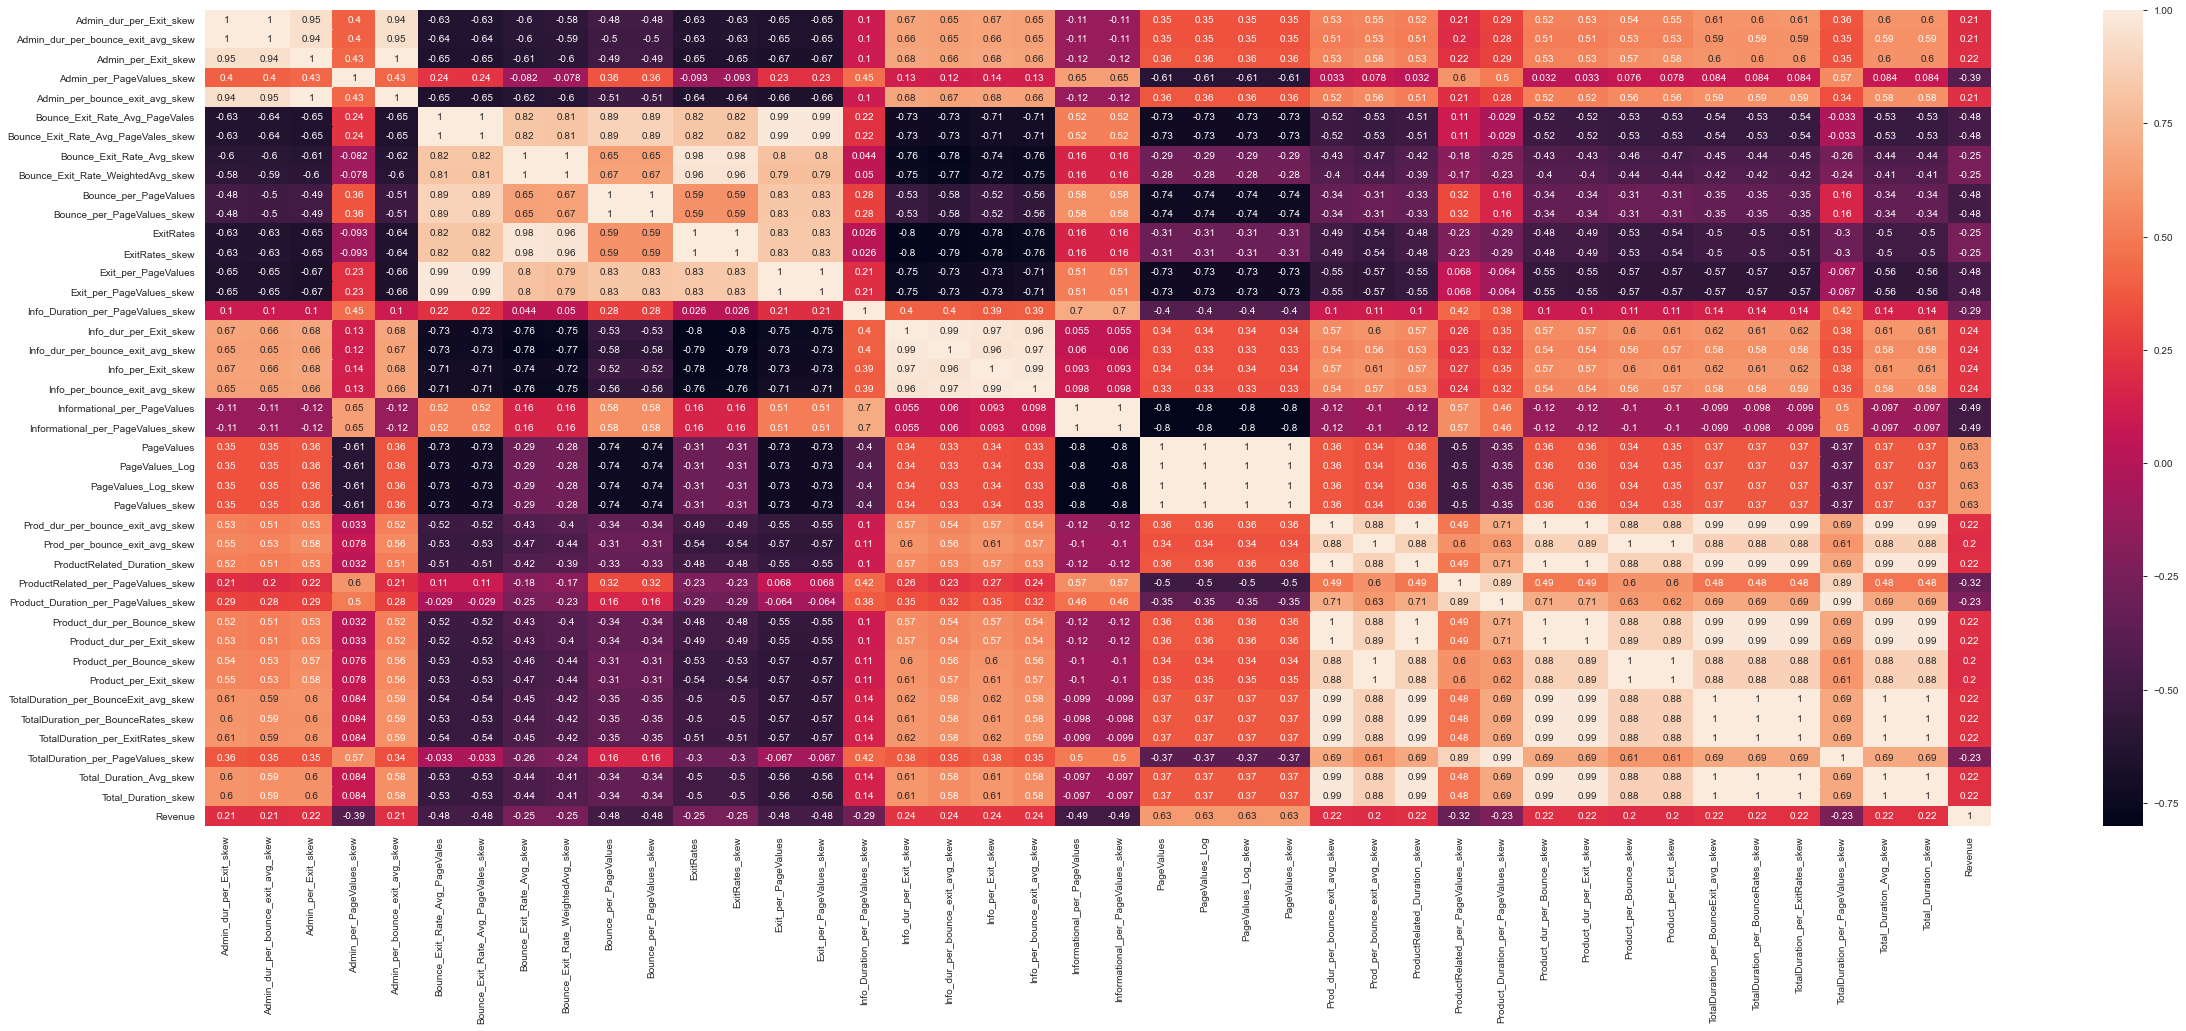

In [31]:
#Correlation Heatmap for the dataframe
possible_Corr_df = df.loc[:,sorted_possible_Features_list]

spearman_possible =possible_Corr_df.corr(method= 'spearman')
plt.figure(figsize=(40,15))
sns.heatmap(spearman_possible, annot=True)

In [32]:
# Filtered out intercorrelated featues for feature importance
continuous_feature_selection = ['Admin_per_Exit_skew','Admin_per_PageValues_skew', 'Bounce_Exit_Rate_Avg_skew','Bounce_per_PageValues_skew','Exit_per_PageValues_skew','Informational_per_PageValues_skew','Info_per_Exit_skew','PageValues_Log_skew',
'Product_per_Exit_skew','ProductRelated_Duration_skew','ProductRelated_per_PageValues_skew','TotalDuration_per_BounceRates_skew','TotalDuration_per_PageValues_skew','Total_Duration_skew']

display(len(continuous_feature_selection))

14

Categorical Features Manual Filter

In [33]:
cat_corr_df = pd.DataFrame(df[categorical_df_list].corrwith(df['Revenue']).abs())

#filter skew attributes by absolute values of 0.001
cat_corr_over = cat_corr_df[(cat_corr_df > 0.2).any(axis=1)]

categorical_model_cols = cat_corr_over.index.tolist()
display(categorical_model_cols)
display(len(categorical_model_cols))


['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Holiday_Bin',
 'Month_Bin',
 'Quarter',
 'OperatingSystems_Bin',
 'Browser_Bin',
 'Region_Bin',
 'TrafficType_Bin']

15

In [34]:
cat_corr_df
Cat_feature_selection = cat_corr_df.index.tolist()
Cat_feature_selection

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Holiday_Bin',
 'Month_Bin',
 'Quarter',
 'OperatingSystems_Bin',
 'Browser_Bin',
 'Region_Bin',
 'TrafficType_Bin']

In [35]:
#Correlation Heatmap for the dataframe
cat_Corr_df = df.loc[:,categorical_df_list]

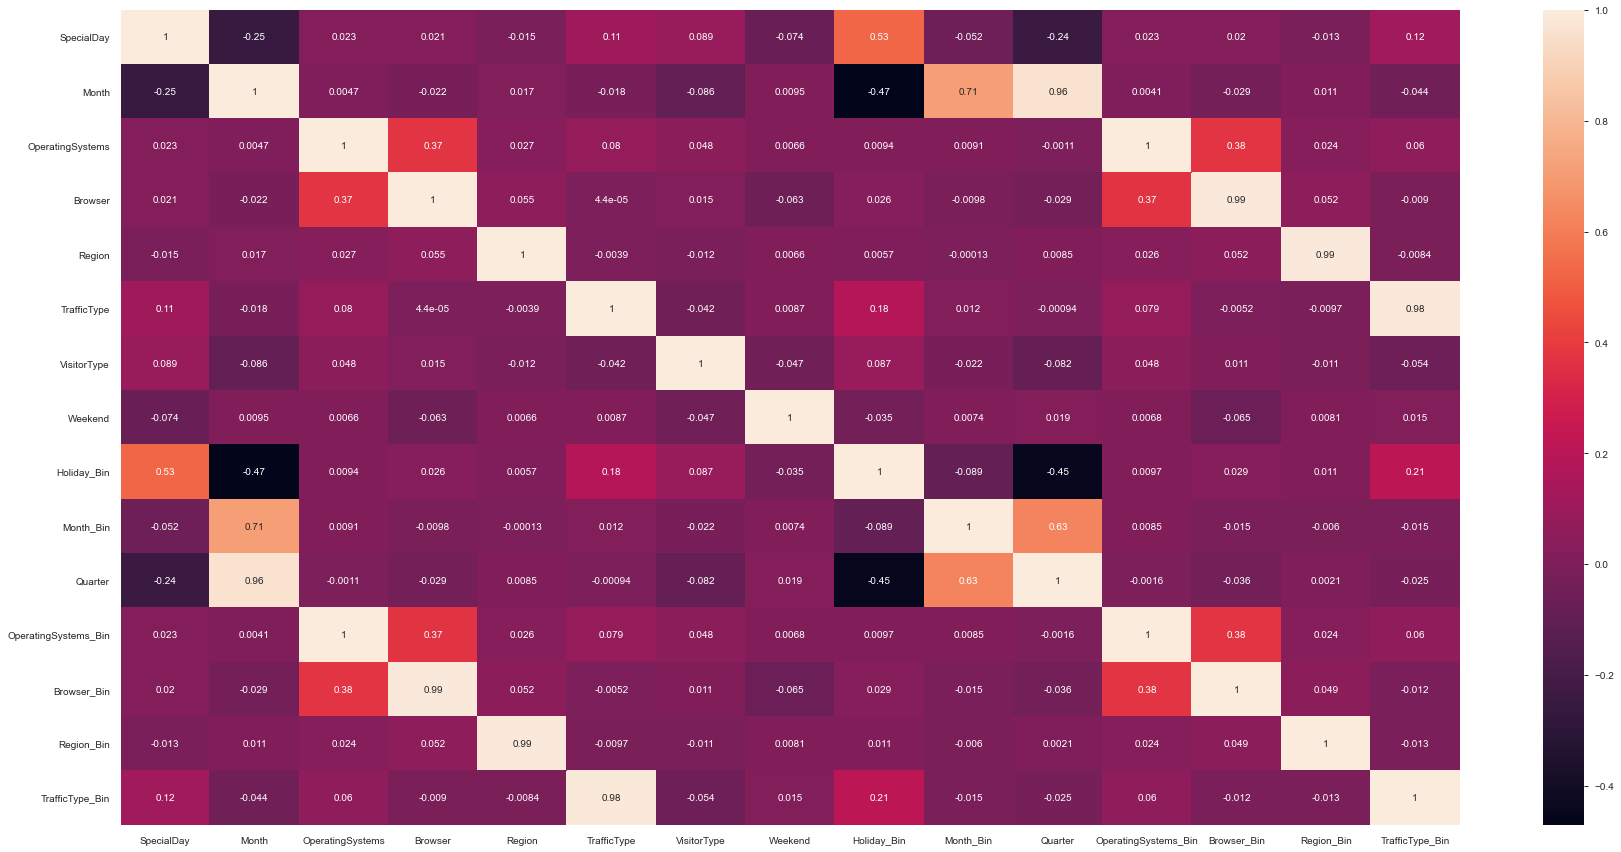

In [36]:
cat_spearman_possible =cat_Corr_df.corr(method ='spearman')
plt.figure(figsize=(30,15))
sns.heatmap(cat_spearman_possible, annot=True)

In [37]:
# Selected the binned and original categorical features to reduce duplication
Cat_feature_selection =['SpecialDay','VisitorType','Weekend','Holiday_Bin','Month_Bin','Quarter','OperatingSystems_Bin','Browser_Bin','Region_Bin','TrafficType_Bin']

In [38]:
# Filtered out intercorrelated featues for feature importance
feature_importance_list = Cat_feature_selection + continuous_feature_selection
display(feature_importance_list,len(feature_importance_list))

['SpecialDay',
 'VisitorType',
 'Weekend',
 'Holiday_Bin',
 'Month_Bin',
 'Quarter',
 'OperatingSystems_Bin',
 'Browser_Bin',
 'Region_Bin',
 'TrafficType_Bin',
 'Admin_per_Exit_skew',
 'Admin_per_PageValues_skew',
 'Bounce_Exit_Rate_Avg_skew',
 'Bounce_per_PageValues_skew',
 'Exit_per_PageValues_skew',
 'Informational_per_PageValues_skew',
 'Info_per_Exit_skew',
 'PageValues_Log_skew',
 'Product_per_Exit_skew',
 'ProductRelated_Duration_skew',
 'ProductRelated_per_PageValues_skew',
 'TotalDuration_per_BounceRates_skew',
 'TotalDuration_per_PageValues_skew',
 'Total_Duration_skew']

24

# 3. Split and run the Final Models with Selected Features and Optimized Hyperperameters  <a name="part4.3"></a>

In [39]:
# Create a full list of continuous and categorical features based on aditional data preparation 
continuous_categorical_list = feature_importance_list

# Specify features (X) and target (Y) in dataset
X,y = df.loc[:,continuous_categorical_list],df.loc[:,'Revenue']

In [40]:
# Resplit the data based on additional data preparation completed post initial split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=500) 

### 3.1 Naive Bayes Model (NB)
>   <b> F1: </b> 65%
<br><b> AUC: </b> 89%
<br><b> Next Steps: </b> Evaluate all models

#### Import Packages

In [41]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#### Feature Importance : Forward Selection

In [42]:
# Source: https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(list(initial_features))>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [43]:
best_features = forward_selection(X_train, y_train, significance_level=0.05)

#### Specify/Build the Model

In [44]:
#Create a Gaussian Classifier
gnb = GaussianNB()

In [45]:
# Train the model using the training sets
gnb.fit(X_train[best_features], y_train)

# Predict the response for testing data
y_NB_pred = gnb.predict(X_test[best_features])

# Model Accuracy, how often is the classifier correct?
print("y Accuracy:",metrics.accuracy_score(y_test, y_NB_pred))

y Accuracy: 0.8740200054068668


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3158
           1       0.55      0.82      0.65       541

    accuracy                           0.87      3699
   macro avg       0.76      0.85      0.79      3699
weighted avg       0.90      0.87      0.88      3699



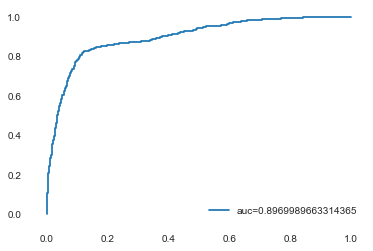

Text(0.5, 257.44, 'Predicted label')

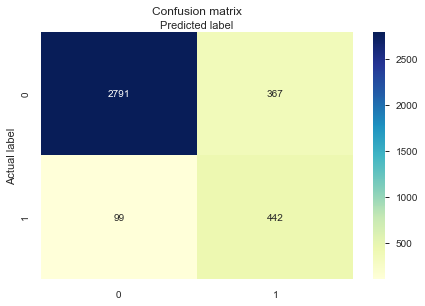

In [46]:
# Create classification report
class_names=[0,1] # name  of classes
print(metrics.classification_report(y_test, y_NB_pred, labels=class_names))

# Compute AUC
y_NB_pred_proba = gnb.predict_proba(X_test[best_features])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_NB_pred_proba)
auc = metrics.roc_auc_score(y_test, y_NB_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("")

# Create Confusion Matrix/Heatmap
cnf_matrix = metrics.confusion_matrix(y_test, y_NB_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### 3.2 Decision Tree Model (DT)
>   <b> F1: </b> 53%
<br><b> AUC: </b> 89%
<br><b> Next Steps: </b> Additional parameter tuning

#### Import Packages

In [47]:
# # Load Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


#### Feature Selection: SelectFromModel 

In [48]:
# from sklearn.feature_selection import SelectFromModel

# embeded_dt_selector = SelectFromModel(DecisionTreeClassifier(), max_features=10)
# embeded_dt_selector.fit(X_train, y_train)
# embeded_dt_support = embeded_dt_selector.get_support()
# embeded_dt_feature = X_train.loc[:,embeded_dt_support].columns.tolist()
# print(str(len(embeded_dt_feature)), 'selected features')
# print(embeded_dt_feature)

7 selected features
['Admin_per_Exit_skew', 'Admin_per_PageValues_skew', 'Bounce_Exit_Rate_Avg_skew', 'Exit_per_PageValues_skew', 'Info_per_Exit_skew', 'Product_per_Exit_skew', 'TotalDuration_per_PageValues_skew']


#### Hyperparamerter Optimization: GridSearch


In [49]:
# #Add in GridSearchCV
# from sklearn.model_selection import GridSearchCV

# #Define the grid
# criterion=['gini','entropy']
# splitter=['best','random']
# max_depth=[2,3,4,5]
# min_samples_split = [2,3]
# param_grid_dt = dict(criterion=criterion, splitter=splitter,max_depth=max_depth,min_samples_split=min_samples_split)

# #Run the grid search
# #import time

# dt = DecisionTreeClassifier()
# grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv = 10, n_jobs=-1)

# #start_time = time.time()
# grid_result_dt = grid_dt.fit(X_train[embeded_dt_feature], y_train)
# # Summarize results
# print("Best: %f using %s" % (grid_result_dt.best_score_, grid_result_dt.best_params_))

# #The below is for execution time - not important for us right now, so commented out
# # print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.894915 using {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [50]:
# # assign selected hyperperameters to a variable for ensamble ranking during the evaluation stage
# dt_Peram_dict = grid_result_dt.best_params_

#### Specify/Build the Model

In [51]:
# #Predict the response for test dataset
# y_DT_pred = grid_dt.predict(X_test[embeded_dt_feature])

# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred))

Accuracy: 0.8937550689375506


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3158
           1       0.75      0.41      0.53       541

    accuracy                           0.89      3699
   macro avg       0.83      0.69      0.74      3699
weighted avg       0.88      0.89      0.88      3699



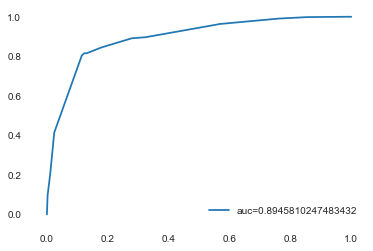

Text(0.5, 257.44, 'Predicted label')

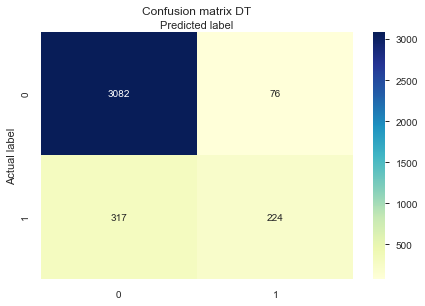

In [52]:
# # Evaluating the Classification Report
# print(metrics.classification_report(y_test, y_DT_pred))

# #AUC for y
# y_DT_pred_proba = grid_dt.predict_proba(X_test[embeded_dt_feature])[::,1]
# fpr_DT, tpr_DT, _ = metrics.roc_curve(y_test,  y_DT_pred_proba)
# auc_DT = metrics.roc_auc_score(y_test, y_DT_pred_proba)
# plt.plot(fpr_DT,tpr_DT,label="auc="+str(auc_DT))
# plt.legend(loc=4)
# plt.show()
# print("")

# #Print Confusion Matrix
# cnf_matrix_DT = metrics.confusion_matrix(y_test, y_DT_pred)
# cnf_matrix_DT
# class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)

# # create heatmap
# sns.heatmap(pd.DataFrame(cnf_matrix_DT), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix DT', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

### 3.3 Random Forest Model (RF)
>   <b> F1: </b> 61%
<br><b> AUC: </b> 90%
<br><b> Next Steps: </b> Evaluate all models

#### Import Packages

In [53]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

#### Feature Selection: SelectFromModel 

In [54]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(), max_features=24)
embeded_rf_selector.fit(X_train, y_train)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

10 selected features
['Admin_per_Exit_skew', 'Admin_per_PageValues_skew', 'Bounce_Exit_Rate_Avg_skew', 'Bounce_per_PageValues_skew', 'Exit_per_PageValues_skew', 'Informational_per_PageValues_skew', 'PageValues_Log_skew', 'Product_per_Exit_skew', 'ProductRelated_per_PageValues_skew', 'TotalDuration_per_PageValues_skew']


#### Hyperparamerter Optimization: GridSearch


In [55]:
# Reference: https://urldefense.com/v3/__https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74*5Cn__;JQ!!KIFmrYtlezdzESbnm_I!UCnvV89lnf4zyYniQ1tmp0cEqfro80T-cjcfwd7vRwyp_8aShQmgOyEKh8XH9GthAmgdQtSt5GubdFc$ 
## Define the grid

# Number of trees in random forest
n_estimators = [10,20,30]
random_state = [10,20,50,100]
criterion=['gini','entropy']
# Number of features to consider at every split
max_features = ['log2', 'sqrt',.10,.15]
# Maximum number of levels in tree
max_depth = [1,5,10]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the parameter grid
param_grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth,criterion=criterion,
               min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,random_state=random_state)

#Run the grid search
#import time

rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5, n_jobs=-1)

#start_time = time.time()
grid_result_rfc = grid_rfc.fit(X_train[embeded_rf_feature], y_train)
# Summarize results
print("Best: %f using %s" % (grid_result_rfc.best_score_, grid_result_rfc.best_params_))

# #The below is for execution time - not important for us right now, so commented out
# # print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.898737 using {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 30, 'random_state': 20}


In [56]:
# assign selected hyperperameters to a variable for ensamble ranking during the evaluation stage
rfc_Peram_dict = grid_result_rfc.best_params_

#### Specify/Build the Model

In [57]:
# Predict the model using the test sets
y_RF_pred = grid_rfc.predict(X_test[embeded_rf_feature])

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_RF_pred))

Accuracy: 0.8953771289537713


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.67      0.56      0.61       541

    accuracy                           0.90      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



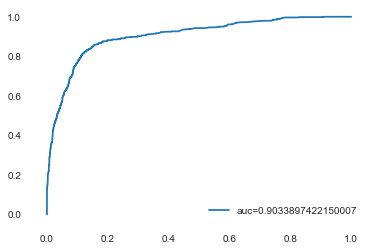

Text(0.5, 257.44, 'Predicted label')

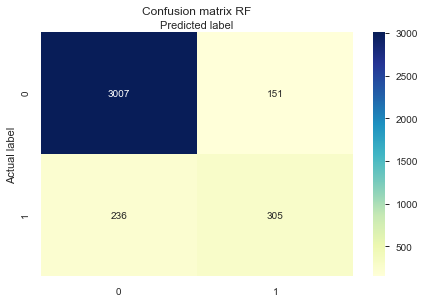

In [58]:
# Evaluation of the Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_RF_pred))

#AUC for y
y_RF_pred_proba = grid_rfc.predict_proba(X_test[embeded_rf_feature])[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test,  y_RF_pred_proba)
auc_RF = metrics.roc_auc_score(y_test, y_RF_pred_proba)
plt.plot(fpr_RF,tpr_RF,label="auc="+str(auc_RF))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_RF_pred)
cnf_matrix_RF
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.4 Support Vector Machines (SVM) Classification Model (SVC)
>   <b> F1: </b> 65%
<br><b> AUC: </b> 87%
<br><b> Next Steps: </b> Evaluate all models

#### Import Packages

In [59]:
# ###1. Step 1: Specify the Model
# from sklearn import svm
# svc = svm.SVC(kernel='rbf',cache_size=7000,gamma= 'scale', C=1, probability =True, degree = 3) # gamma= 0.001 , kernel='poly', 'rbf',‘linear’

#### Feature Selection: SelectFromModel 

In [60]:
# from sklearn.feature_selection import RFE
# svc = svm.SVC(kernel='linear',cache_size=7000,gamma= 'auto', C=5, probability =True, degree = 5)

# svc_selector = RFE(estimator=svc, n_features_to_select=14, step=20, verbose=5)
# svc_selector.fit(X_train, y_train)
# svc_support = svc_selector.get_support()
# svc_feature = X_train.loc[:,svc_support].columns.tolist()

# print(str(len(svc_feature)), 'selected features')
# print(svc_feature)

Fitting estimator with 24 features.
14 selected features
['SpecialDay', 'Holiday_Bin', 'Admin_per_PageValues_skew', 'Bounce_Exit_Rate_Avg_skew', 'Bounce_per_PageValues_skew', 'Exit_per_PageValues_skew', 'Informational_per_PageValues_skew', 'Info_per_Exit_skew', 'PageValues_Log_skew', 'Product_per_Exit_skew', 'ProductRelated_Duration_skew', 'ProductRelated_per_PageValues_skew', 'TotalDuration_per_BounceRates_skew', 'Total_Duration_skew']


#### Hyperparamerter Optimization: GridSearch


In [61]:
# #Define the grid
# # kernel =['linear','poly','rbf']
# # C_penalty=[1.0, .75, .5] #From tutorial - C is for how much to "penalize" classifier; default is 1 and it can go down to 0
# # cache_size=[7000,2000,1000,500] 
# # gamma= ['auto','scale', 'auto']
# # degree=[1,3,5]
# # tol=[0.003,0.005]
# param_grid =[{'C': [1, 10, 100, 1000], 'kernel': ['linear'],'cache_size': [1000,3000,5000],'probability': [True]},{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf'],'cache_size': [1000,3000,5000],'probability': [True]}]

# #Run the grid search

# SVM = svm.SVC()
# grid_svc = GridSearchCV(estimator=SVM, param_grid=param_grid, cv = 5, n_jobs=-1)

# # start_time = time.time()
# grid_result_svc = grid_svc.fit(X_train[svc_feature], y_train)
# # Summarize results
# print("Best: %f using %s" % (grid_result_svc.best_score_, grid_result_svc.best_params_))

# #The below is for execution time - not important for us right now, so commented out
# # print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.893407 using {'C': 1000, 'cache_size': 1000, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}


In [62]:
# assign selected hyperperameters to a variable for ensamble ranking during the evaluation stage
svc_Peram_dict = grid_result_svc.best_params_

#### Specify/Build the Model

In [63]:
#Predict the response for test dataset
y_pred_svc = grid_svc.predict(X_test[svc_feature])

# Model Accuracy, how often is the classifier correct?
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))

Accuracy_svc: 0.8926736955934036


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3158
           1       0.62      0.69      0.65       541

    accuracy                           0.89      3699
   macro avg       0.78      0.81      0.79      3699
weighted avg       0.90      0.89      0.90      3699



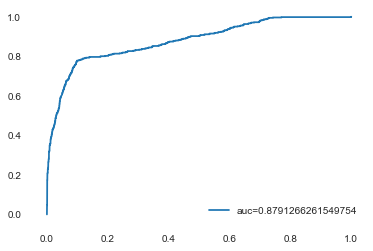

Text(0.5, 257.44, 'Predicted label')

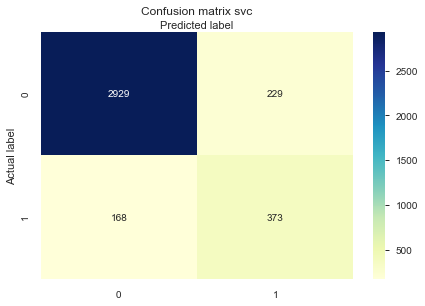

In [64]:
#Create classification report
print(classification_report(y_test, y_pred_svc))

#Compute AUC
y_SVM_pred_proba = grid_svc.predict_proba(X_test[svc_feature])[::,1]
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(y_test,  y_SVM_pred_proba)
auc_SVM = metrics.roc_auc_score(y_test, y_SVM_pred_proba)
plt.plot(fpr_SVM,tpr_SVM,label="auc="+str(auc_SVM))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix/Heatmap
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)
cnf_matrix_svc
class_names_svc=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_svc = np.arange(len(class_names_svc))
plt.xticks(tick_marks_svc, class_names_svc)
plt.yticks(tick_marks_svc, class_names_svc)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix svc', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### 3.5. XGBoost Model (XGB)
>   <b> Accuracy: </b> 61%
<br><b> AUC: </b> 91%
<br><b> RMSE: </b> .32
<br><b> Next Steps: </b> Evaluate all models


#### Import Packages

In [65]:
#Import Needed Packages
import xgboost as xgb
from sklearn.metrics import mean_squared_error

#### Feature Selection: SelectFromModel 

In [66]:
# Source: https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784

from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101,n_jobs =10 )
regr.fit(X_train, y_train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_test, y_test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 
#lasso_support = regr.get_support()

LassoCV Best Alpha Scored:  0.00022150867651258457
LassoCV Model Accuracy:  0.3924275089467305
Variables Eliminated:  3
Variables Kept:  21


In [67]:
#Instantiate an XGBoost Classifer Model
XGB_class = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)


Text(0.5, 1.0, 'Most Important Features Identified using Lasso')

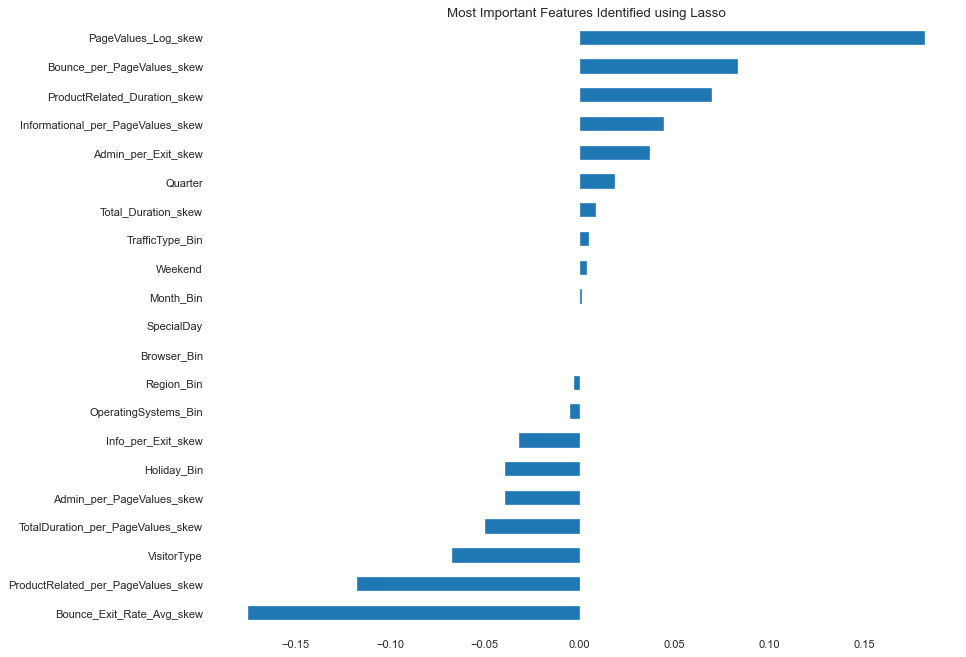

In [68]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values() # possible sort by index
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso")

In [69]:
top_lasso = top_coef[abs(top_coef) > 0.035]
lasso_best = top_lasso.index.tolist()
display(lasso_best)

['Bounce_Exit_Rate_Avg_skew',
 'ProductRelated_per_PageValues_skew',
 'VisitorType',
 'TotalDuration_per_PageValues_skew',
 'Admin_per_PageValues_skew',
 'Holiday_Bin',
 'Admin_per_Exit_skew',
 'Informational_per_PageValues_skew',
 'ProductRelated_Duration_skew',
 'Bounce_per_PageValues_skew',
 'PageValues_Log_skew']

#### Hyperparamerter Optimization: GridSearch


In [70]:
#Define the grid
objective=['reg:squarederror','binary:logistic']
learning_rate=[.1,0.5,1]
max_depth=[1, 3, 5]
colsample_bytree = [0.3,0.2,0.1]
param_grid_xgb = dict(objective=objective,learning_rate=learning_rate,max_depth=max_depth,colsample_bytree=colsample_bytree)

#Run the grid search
XGB = xgb.XGBClassifier(n_estimators = 100)
grid_xgb = GridSearchCV(estimator=XGB, param_grid=param_grid_xgb, cv = 10, n_jobs=-1)

#Train the model
grid_result_xgb = grid_xgb.fit(X_train[lasso_best], y_train)

# Summarize results
print("Best: %f using %s" % (grid_result_xgb.best_score_, grid_result_xgb.best_params_))


Best: 0.898041 using {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'objective': 'binary:logistic'}


In [71]:
# assign selected hyperperameters to a variable for ensamble ranking during the evaluation stage
xgb_Peram_dict = grid_result_xgb.best_params_

#### Specify/Build the Model

In [72]:
#Put Data into structure for XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=y)

#Predict the response for test dataset
y_XGB_pred = grid_xgb.predict(X_test[lasso_best])

print("y Accuracy:",metrics.accuracy_score(y_test, y_XGB_pred))

y Accuracy: 0.8961881589618816


#### Evaluate the Model

XGBoost's RMSE for y2 is: 0.322198
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.68      0.56      0.61       541

    accuracy                           0.90      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



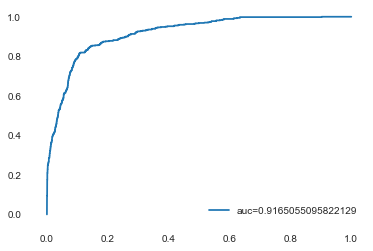

Text(0.5, 257.44, 'Predicted label')

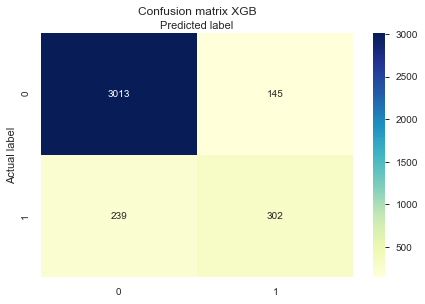

In [73]:
# Calculate RMSE
rmse_XGB = np.sqrt(mean_squared_error(y_test, y_XGB_pred))
print("XGBoost's RMSE for y2 is: %f" % (rmse_XGB))

# #Create error ratio to evaluate results for y
# target_range_XGB = y.max() - y.min()
# print("XGB target range is: %f" % (target_range_XGB))
# error_ratio_XGB = rmse_XGB/target_range_XGB
# print("XGBoost's Error Ratio for y2 is: %f" % (error_ratio_XGB))

# Create classification report
print(metrics.classification_report(y_test, y_XGB_pred, labels=class_names))

# Compute AUC
y_XGB_pred_proba = grid_xgb.predict_proba(X_test[lasso_best])[::,1]
fpr_XGB, tpr_XGB, _ = metrics.roc_curve(y_test,  y_XGB_pred_proba)
auc_XGB = metrics.roc_auc_score(y_test, y_XGB_pred_proba)
plt.plot(fpr_XGB,tpr_XGB,label="auc="+str(auc_XGB))
plt.legend(loc=4)
plt.show()
print("")

# Print Confusion Matrix/Heatmap
cnf_matrix_XGB = metrics.confusion_matrix(y_test, y_XGB_pred)
cnf_matrix_XGB
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_XGB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix XGB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.6 Neural Network Model (NN)
>   <b> F1: </b> 62%
<br><b> AUC: </b> 92%
<br><b> Next Steps: </b> Evaluate all models

#### Import Packages

In [74]:
# X_train, X_test, y1_Models_train, y1_Models_test, y2_Models_train, y2_Models_test


###1. Step 1: Specify the Model
# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
# mlp = MLPClassifier(hidden_layer_sizes = (3,1),solver='sgd',learning_rate_init= 0.01, max_iter=50)
# mlp= MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, 
# beta_2=0.999, early_stopping=False, epsilon=1e-08,       
# hidden_layer_sizes=(7,3), learning_rate='adaptive',      
# learning_rate_init=0.01, max_iter=10, momentum=0.9,       
# nesterovs_momentum=True, power_t=0.5, random_state=1000,       
# shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,       
# verbose=False, warm_start=True)

#### Feature Selection: SelectFromModel 

In [75]:
nn_feature_selection = best_features

#### Hyperparamerter Optimization: GridSearch


In [76]:
# PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 

#Add in GridSearchCV
from sklearn.model_selection import GridSearchCV
mlp= MLPClassifier()

#Define the grid
activation=['identity','logistic', 'tanh', 'relu']
batch_size=['auto',50,100]
solver=['adam','lbfgs','sgd']
param_grid = dict(activation=activation,batch_size=batch_size,solver=solver)

#Run the grid search
#import time

grid_nn = GridSearchCV(estimator=mlp, param_grid=param_grid, cv = 5, n_jobs=-1)

#start_time = time.time()
grid_result_nn = grid_nn.fit(X_train[nn_feature_selection], y_train)
# Summarize results
print("Best: %f using %s" % (grid_result_nn.best_score_, grid_result_nn.best_params_))

#The below is for execution time - not important for us right now, so commented out
# print("Execution time: " + str((time.time() - start_time)) + ' ms'

Best: 0.900938 using {'activation': 'relu', 'batch_size': 100, 'solver': 'adam'}


In [77]:
# assign selected hyperperameters to a variable for ensamble ranking during the evaluation stage
NN_Peram_dict_1 = grid_result_nn.best_params_

In [78]:
# PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 

#Add in GridSearchCV
from sklearn.model_selection import GridSearchCV
mlp2 = MLPClassifier(activation= 'logistic', batch_size= 50, solver= 'adam')


#Define the grid
hidden_layer_sizes2=[3,5,6,7,10,[6,2],[5,3],[4,3],[4,2],[8,3],[7,3]]
# activation2=['tanh']
# batch_size2=[50]
learning_rate2=['adaptive','constant','invscaling']      
random_state2=[100,500,1000,2000,3000]       
# solver2=['adam']

param_grid2 = dict(hidden_layer_sizes=hidden_layer_sizes2,activation=['logistic'],batch_size=[50],learning_rate=learning_rate2,random_state=random_state2,solver=['adam'])

#Run the grid search
#import time

grid_nn2 = GridSearchCV(estimator=mlp2, param_grid=param_grid2, cv = 3, n_jobs=-1)

#start_time = time.time()
grid_result_nn2 = grid_nn2.fit(X_train[nn_feature_selection], y_train)
# Summarize results
print("Best: %f using %s" % (grid_result_nn2.best_score_, grid_result_nn2.best_params_))

#The below is for execution time - not important for us right now, so commented out
# print("Execution time: " + str((time.time() - start_time)) + ' ms'

Best: 0.899316 using {'activation': 'logistic', 'batch_size': 50, 'hidden_layer_sizes': 5, 'learning_rate': 'adaptive', 'random_state': 3000, 'solver': 'adam'}


In [79]:
# assign selected hyperperameters to a variable for ensamble ranking during the evaluation stage
NN_Peram_dict_2 = grid_result_nn2.best_params_

#### Specify/Build the Model

In [80]:
# Predict response for test data
y_pred_nn = grid_nn2.predict(X_test[nn_feature_selection])

# Print model accuracy (i.e., how often the classifier is correct)
print("MLP score is",grid_nn2.score(X_test[nn_feature_selection],y_test))

MLP score is 0.8997026223303596


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3158
           1       0.69      0.56      0.62       541

    accuracy                           0.90      3699
   macro avg       0.81      0.76      0.78      3699
weighted avg       0.89      0.90      0.90      3699



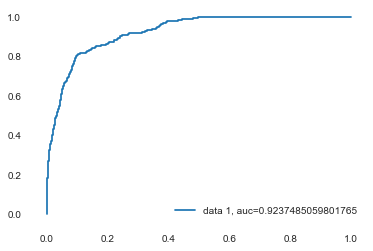

Text(0.5, 257.44, 'Predicted label')

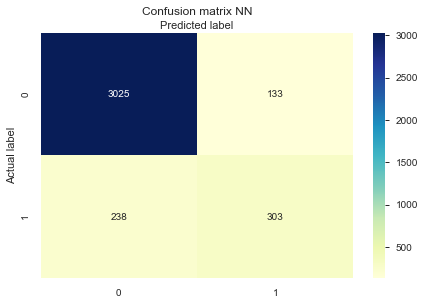

In [81]:
# Create classification report
print(classification_report(y_test, y_pred_nn))

# Compute AUC
y_pred_proba_nn = grid_nn2.predict_proba(X_test[nn_feature_selection])[::,1]
fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
plt.legend(loc=4)
plt.show()

# Print Confusion Matrix/Heatmap
cnf_matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)
cnf_matrix_nn
class_names_nn=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_nn = np.arange(len(class_names_nn))
plt.xticks(tick_marks_nn, class_names_nn)
plt.yticks(tick_marks_nn, class_names_nn)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix NN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.7 Logistic Regression Model

>   <b> F1: </b> 62%
<br><b> AUC: </b> 89%
<br><b> Next Steps: </b> Evaluate all models


#### Import Packages

In [82]:
#Build the model
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)

#### Feature Selection: SelectFromModel 

In [83]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=10)
embeded_lr_selector.fit(X_train, y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

8 selected features
['VisitorType', 'Holiday_Bin', 'Bounce_Exit_Rate_Avg_skew', 'Bounce_per_PageValues_skew', 'Exit_per_PageValues_skew', 'Informational_per_PageValues_skew', 'PageValues_Log_skew', 'ProductRelated_per_PageValues_skew']


#### Hyperparamerter Optimization: GridSearch


In [84]:
# PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 

#Add in GridSearchCV
from sklearn.model_selection import GridSearchCV

#Define the grid
dual=[True,False]
max_iter=[100,110,120,130,140]
C=[1.0,1.5,2.0,2.5]
solver=['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
penalty=['l1', 'l2', 'elasticnet', 'none']
param_grid = dict(dual=dual,max_iter=max_iter,C=C,solver=solver,penalty=penalty)

#Run the grid search
lr = LogisticRegression()
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 10, n_jobs=-1, scoring='f1')

#start_time = time.time()
grid_result_lr = grid_lr.fit(X_train[embeded_lr_feature], y_train)
# Summarize results
print("Best: %f using %s" % (grid_result_lr.best_score_, grid_result_lr.best_params_))

Best: 0.642121 using {'C': 1.0, 'dual': False, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}


In [85]:
# assign selected hyperperameters to a variable for ensamble ranking during the evaluation stage
lr_Peram_dict = grid_result_lr.best_params_

#### Specify/Build the Model

In [86]:
# Predict response for test data
y_LR_pred=grid_lr.predict(X_test[embeded_lr_feature])

# Print model accuracy (i.e., how often the classifier is correct)
print("Accuracy:",metrics.accuracy_score(y_test, y_LR_pred))

Accuracy: 0.889970262233036


#### Evaluate the Model

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3158
           1       0.63      0.62      0.62       541

    accuracy                           0.89      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.89      0.89      0.89      3699



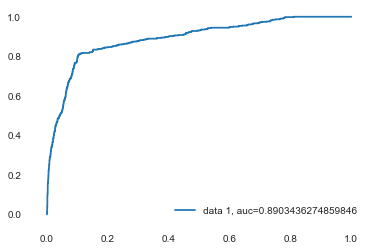

Text(0.5, 257.44, 'Predicted label')

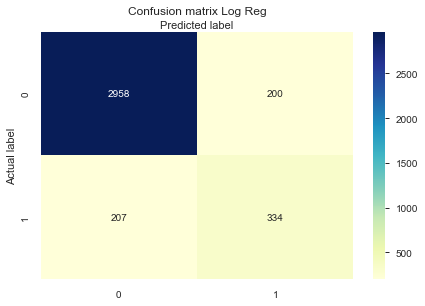

In [87]:
# Create Classification Report
print(metrics.classification_report(y_test, y_LR_pred))

# Compute AUC
y_LR_pred_proba = grid_lr.predict_proba(X_test[embeded_lr_feature])[::,1]
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_test,  y_LR_pred_proba)
auc_LR = metrics.roc_auc_score(y_test, y_LR_pred_proba)
plt.plot(fpr_LR,tpr_LR,label="data 1, auc="+str(auc_LR))
plt.legend(loc=4)
plt.show()

# Print the Confusion Matrix/Heatmap
cnf_matrix_LogR = metrics.confusion_matrix(y_test, y_LR_pred)
cnf_matrix_LogR
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Log Reg', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 4. Evaluate all the methods and compare using ensemble ranking  <a name="part4.4"></a>

In [88]:
DT_Optimized = DecisionTreeClassifier(**dt_Peram_dict)
RF_Optimized = RandomForestClassifier(**rfc_Peram_dict)
SVM_Optimized = svm.SVC(**svc_Peram_dict)
XGB_Optimized = xgb.XGBClassifier(**xgb_Peram_dict)
GNB_Optimized = GaussianNB()
LR_Optimized = LogisticRegression(**lr_Peram_dict)
NN_Optimized = MLPClassifier(**NN_Peram_dict_2)

>lr 0.632 (0.026)
>xgb 0.658 (0.026)
>tree 0.632 (0.049)
>svm 0.660 (0.026)
>nn 0.646 (0.027)
>bayes 0.660 (0.025)
>rforest 0.634 (0.029)


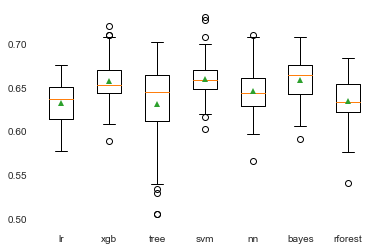

In [89]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
import xgboost as xgb


# get a list of models to evaluate
def get_scores():

#     models'lr'] = LR_Optimized
#     models['xgb'] = XGB_Optimized
#     models['tree'] = DT_Optimized
#     models['svm'] = SVM_Optimized
#     models['nn'] = NN_Optimized
#     models['bayes'] = GNB_Optimized
#     models['rforest'] = RF_Optimized
    y = y_test
    X_lr = X_test[embeded_lr_feature]
    X_xgb = X_test[lasso_best]
    X_tree = X_test[embeded_dt_feature]
    X_svm = X_test[svc_feature]
    X_nn = X_test[nn_feature_selection]
    X_bayes = X_test[embeded_lr_feature]
    X_rforest = X_test[embeded_rf_feature]
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=500)
    
    scores = dict()
    scores['lr'] = cross_val_score(LR_Optimized, X_lr, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    scores['xgb'] = cross_val_score(XGB_Optimized, X_xgb, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    scores['tree'] = cross_val_score(DT_Optimized, X_tree, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    scores['svm'] = cross_val_score(SVM_Optimized, X_svm, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    scores['nn'] = cross_val_score(NN_Optimized, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    scores['bayes'] = cross_val_score(GNB_Optimized, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    scores['rforest'] = cross_val_score(RF_Optimized, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')

    return scores

scores = get_scores()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.632 (0.026)
>xgb 0.658 (0.026)
>tree 0.632 (0.049)
>svm 0.660 (0.026)
>nn 0.646 (0.027)
>bayes 0.660 (0.025)
>rforest 0.634 (0.029)


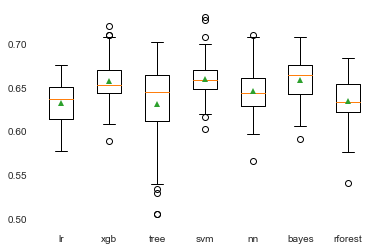

In [89]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
import xgboost as xgb


# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LR_Optimized
    models['xgb'] = XGB_Optimized
    models['tree'] = DT_Optimized
    models['svm'] = SVM_Optimized
    models['nn'] = NN_Optimized
    models['bayes'] = GNB_Optimized
    models['rforest'] = RF_Optimized
    return models

# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=500)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
#X, y = X_test,y_test
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [90]:
# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('xgb', XGB_Optimized))
    level0.append(('tree', DT_Optimized))
    level0.append(('forest',RF_Optimized ))
    level0.append(('lr', LR_Optimized))
    level0.append(('svm', SVM_Optimized))
    level0.append(('nn', NN_Optimized))
    level0.append(('bayes', GNB_Optimized))
# define meta learner model
    level1 = XGB_Optimized
# define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


>lr 0.622 (0.058)
>xgb 0.649 (0.059)
>tree 0.559 (0.076)
>svm 0.644 (0.063)
>nn 0.628 (0.056)
>bayes 0.644 (0.054)
>rforest 0.618 (0.063)
>stacking 0.636 (0.070)


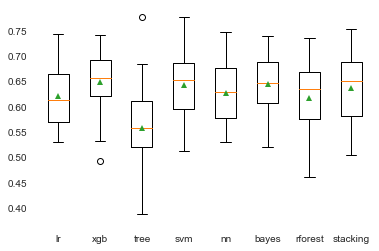

In [91]:
from sklearn.ensemble import StackingClassifier

# get a list of models to evaluate
def get_stacked_models():
    models = dict()
    models['lr'] = LR_Optimized
    models['xgb'] = XGB_Optimized
    models['tree'] = DT_Optimized
    models['svm'] = SVM_Optimized
    models['nn'] = NN_Optimized
    models['bayes'] = GNB_Optimized
    models['rforest'] = RF_Optimized
    models['stacking'] = get_stacking()
    return models


# # evaluate stacked given model using cross-validation
# def evaluate_stacked_model(model):
# 	cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# 	return scores

# define dataset
X, y = X_test,y_test
# get the models to evaluate
models_stacked = get_stacked_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models_stacked.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# 5. Run and evaluate the final models using TPOT  <a name="part4.6"></a>

In [93]:
from tpot import TPOTClassifier

# from tpot import TPOTRegressor # for regression tasks

tpot = TPOTClassifier(generations=5,verbosity=2, n_jobs=-1,max_time_mins=45, 
                      max_eval_time_mins=5, scoring='f1_weighted')

tpot.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.9017140418379895
Generation 2 - Current best internal CV score: 0.9017140418379895
Generation 3 - Current best internal CV score: 0.9029203734239033
Generation 4 - Current best internal CV score: 0.9029203734239033

46.32 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: KNeighborsClassifier(SelectFwe(input_matrix, alpha=0.007), n_neighbors=71, p=1, weights=uniform)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               max_eval_time_mins=5, max_time_mins=45, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring='f1_weighted', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [94]:
tpot.score(X_test, y_test)

0.904588971536637